# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

# Overview
##### Here we begin by loading the dataset and performing basic cleaning. We ensure that all the variables are correctly formatted. We aggregate the data by year to create structured time series.

In [37]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head(4)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83


In [53]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

#describe tge data 
print(f"Description of data containing numerical values: {df.describe}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64
Description of data containing numerical values: <bound method NDFrame.describe of          Year  Global Average Temperature (°C)  CO2 Concentration

In [39]:
# TODO: Aggregate data by year to create a 124-year time 
ag_data = df.groupby('Year').mean().reset_index()
print(ag_data.head())

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.138338                       9.056501  
4           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

## Objective
##### In this section, we analyze each climate variables individually. We perform descriptive statistics like Mean, Median, Standard Deviation, Min, and Max. Additionally, we use visualization tools like histograms, boxplots, lineplot, and kdeplot to identify trends and outliers. 

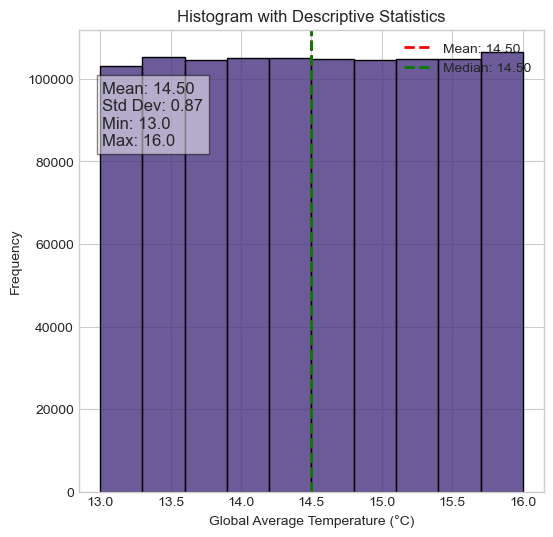

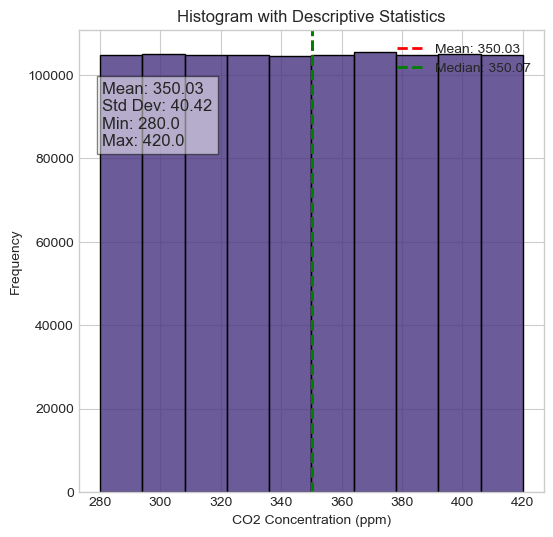

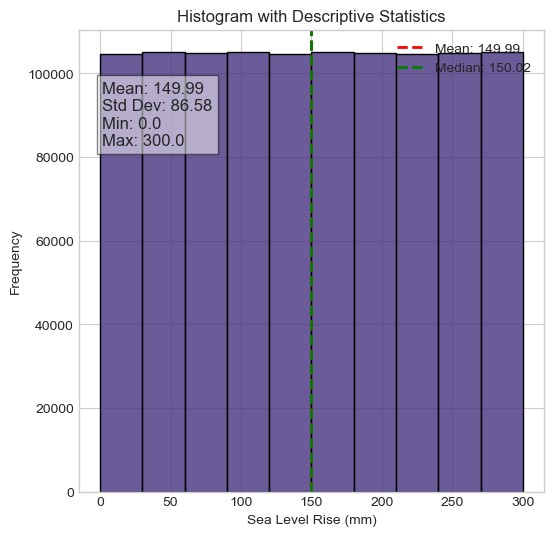

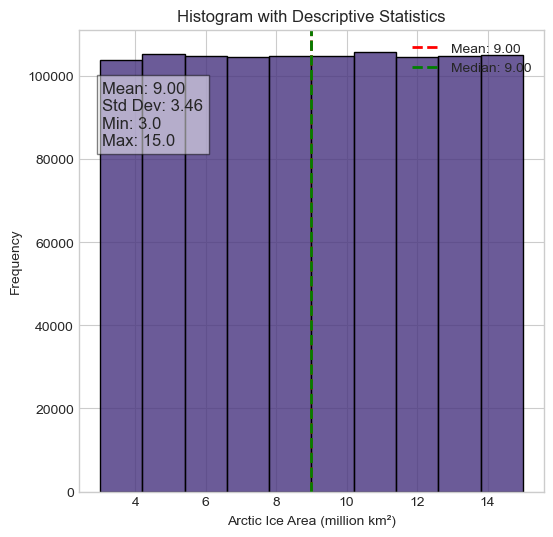

In [40]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# histplot for df.columns
for var in df.columns:
 if var != "Year":
  descriptive_stats = df[var].describe()
  plt.figure(figsize = (6,6))
  sns.histplot(data = df, x = var, bins = 10, alpha = 0.8)
  plt.axvline(descriptive_stats["mean"], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {descriptive_stats['mean']:.2f}")
  plt.axvline(descriptive_stats["50%"], color='green', linestyle='dashed', linewidth=2, label=f"Median: {descriptive_stats['50%']:.2f}")
  
  stats_text = (f"Mean: {descriptive_stats['mean']:.2f}\n"
  # Display text box with statistics
                f"Std Dev: {descriptive_stats['std']:.2f}\n"
                f"Min: {descriptive_stats['min']}\n"
                f"Max: {descriptive_stats['max']}")
  plt.text(0.05, 0.75, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
  
  plt.legend()
  plt.title("Histogram with Descriptive Statistics")
  plt.xlabel(var)
  plt.ylabel("Frequency")
  plt.show()


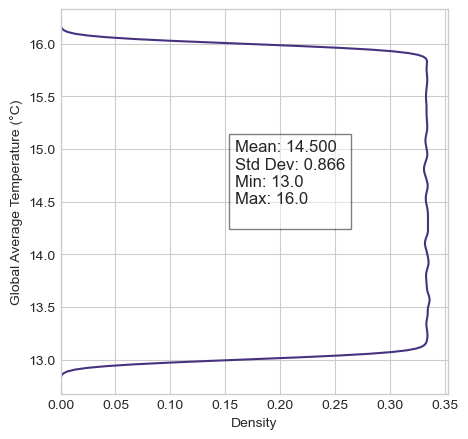

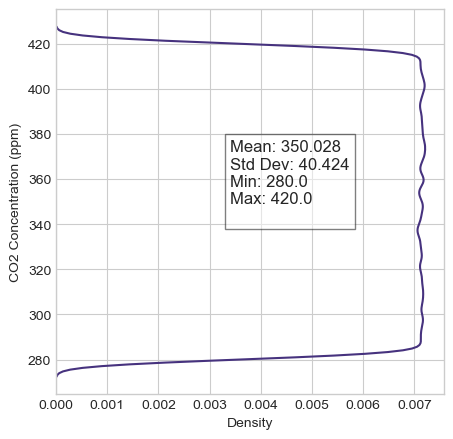

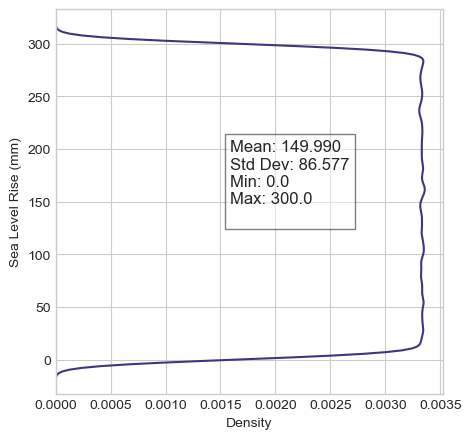

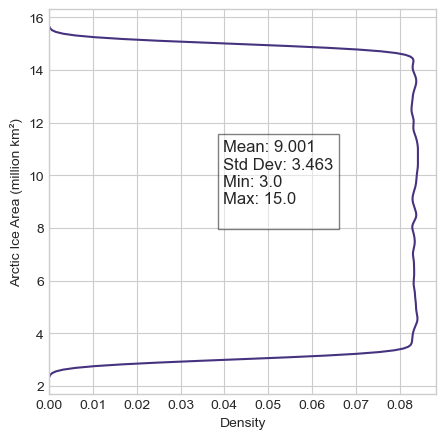

In [41]:
#kdeplot for next column CO2 Concentration (ppm)
for var in df.columns:
 if var != "Year":
  discribe = df[var].describe()
  
  plt.figure(figsize=(5,5))
  sns.kdeplot(data= df, y = var )
  discriptivetext = (f"Mean: {discribe['mean']:.3f}\n"
                     f"Std Dev: {discribe['std']:.3f}\n"
                     f"Min: {discribe['min']}\n"
                     f"Max: {discribe['max']}\n")
  plt.text(0.45, 0.45, discriptivetext, transform = plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
  plt.show()

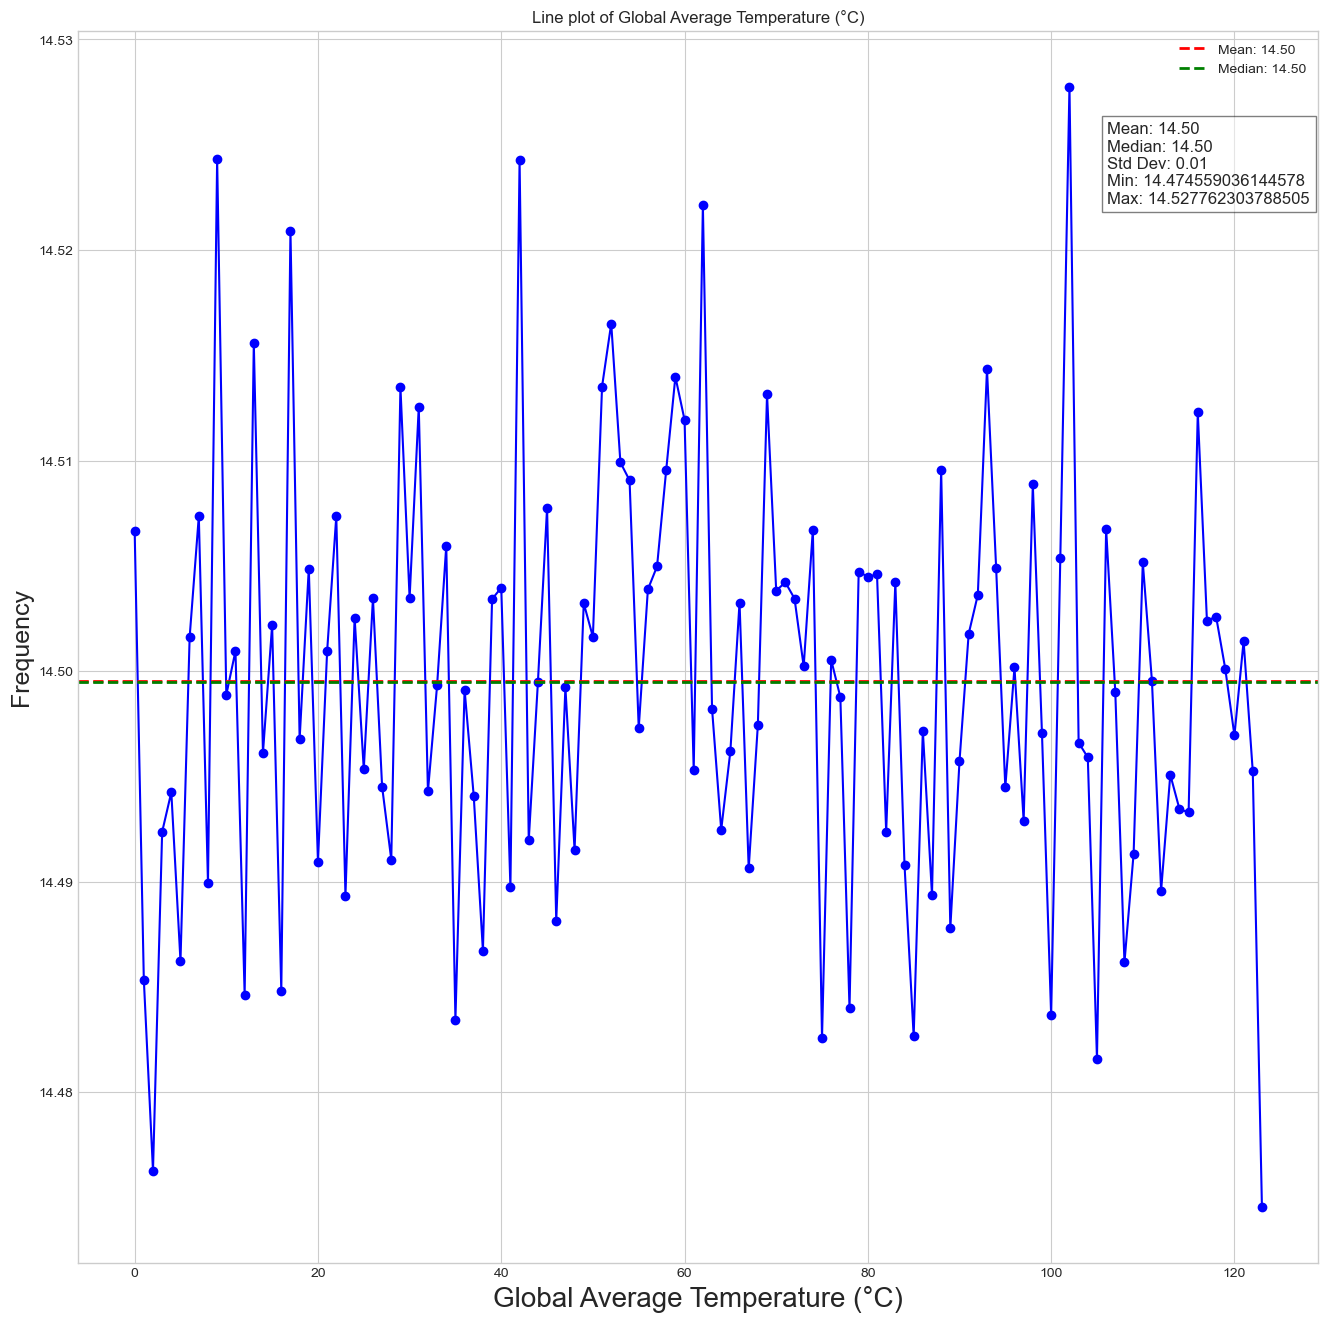

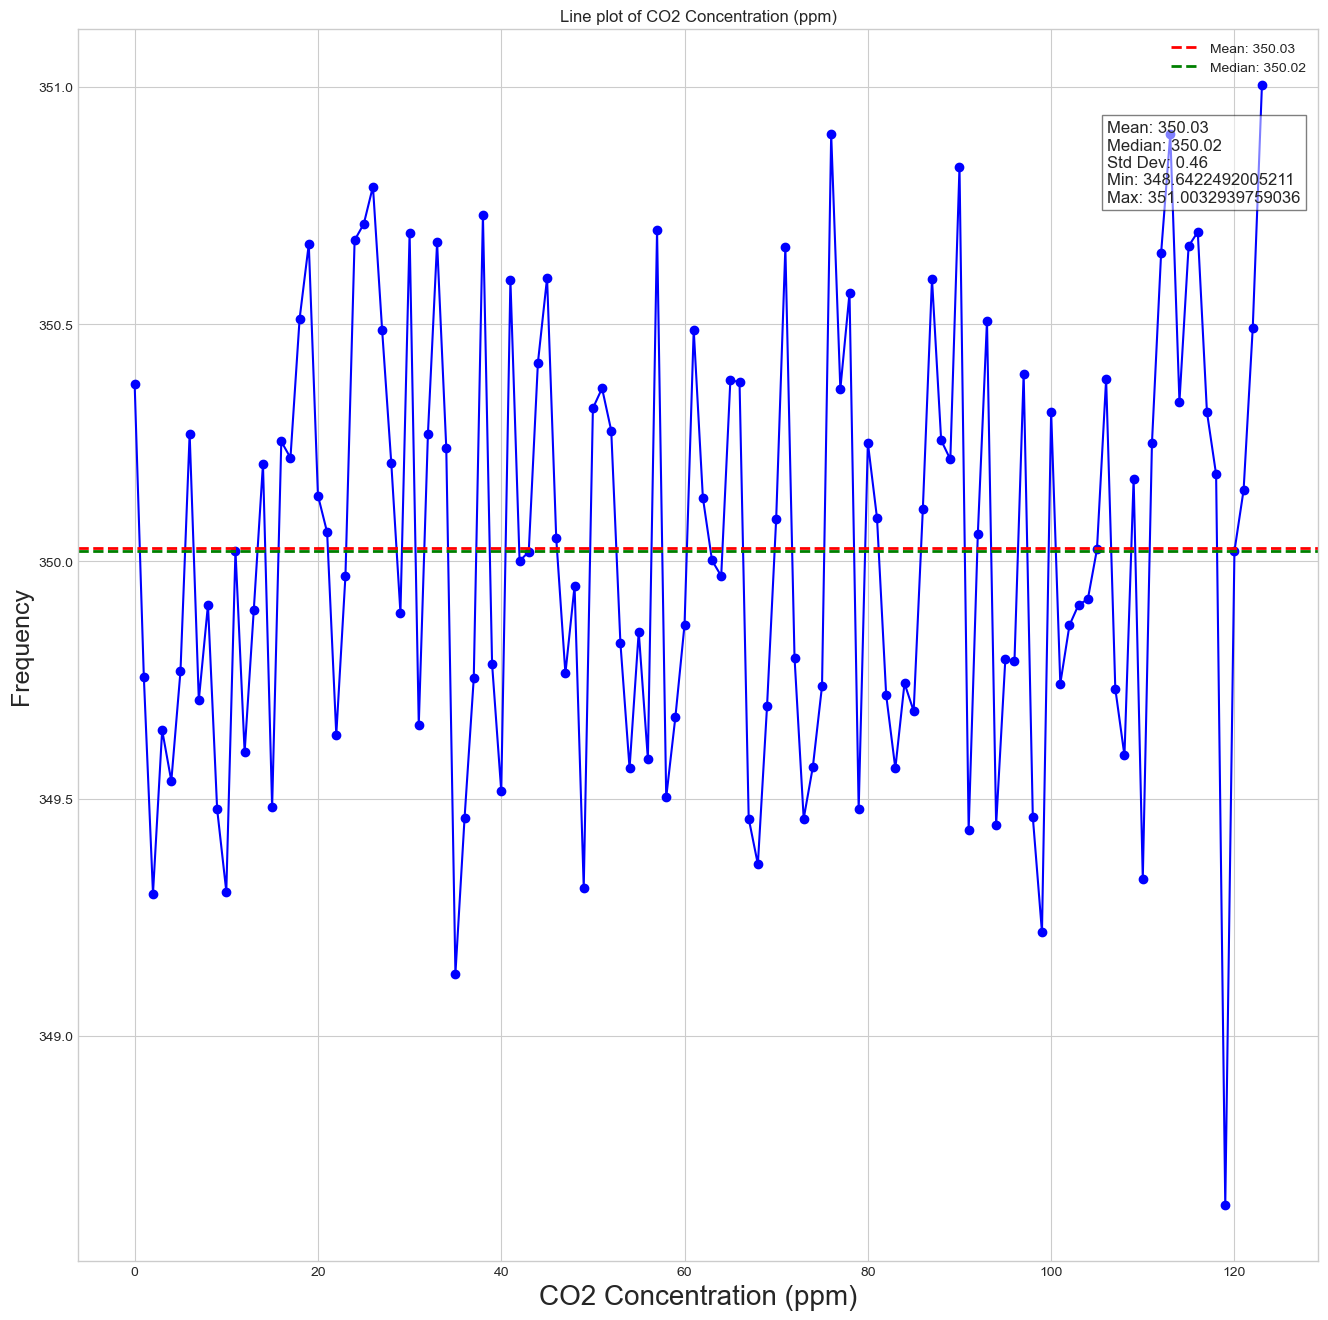

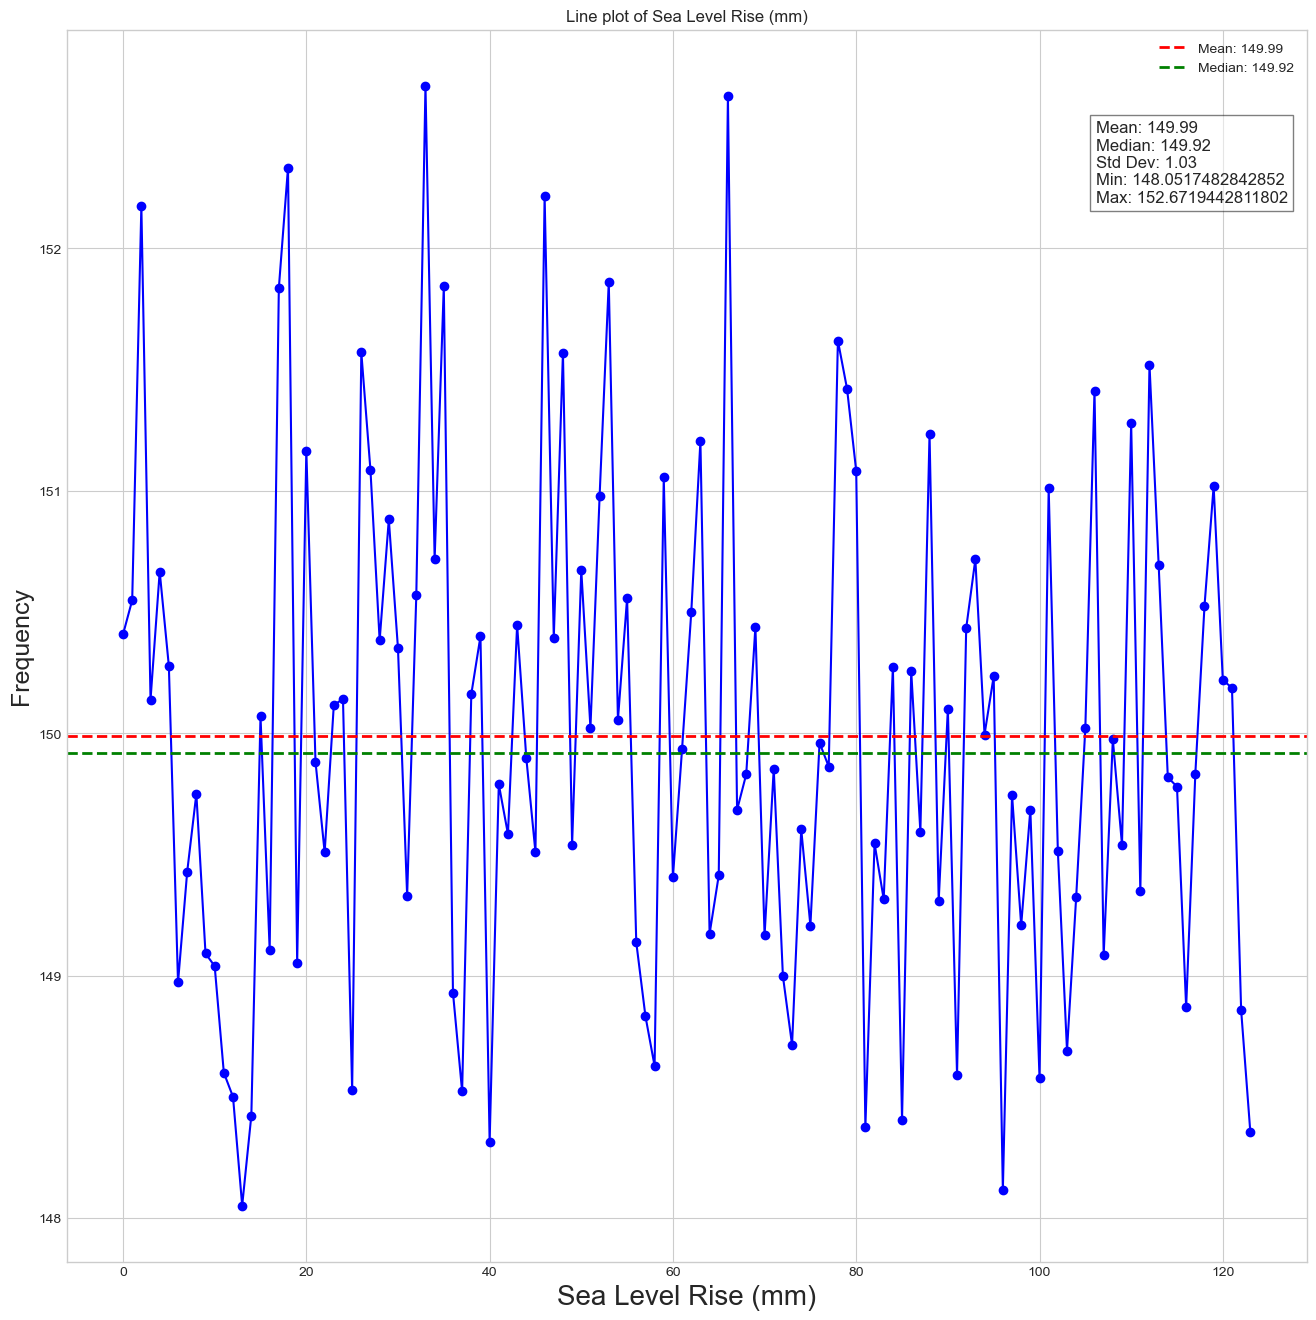

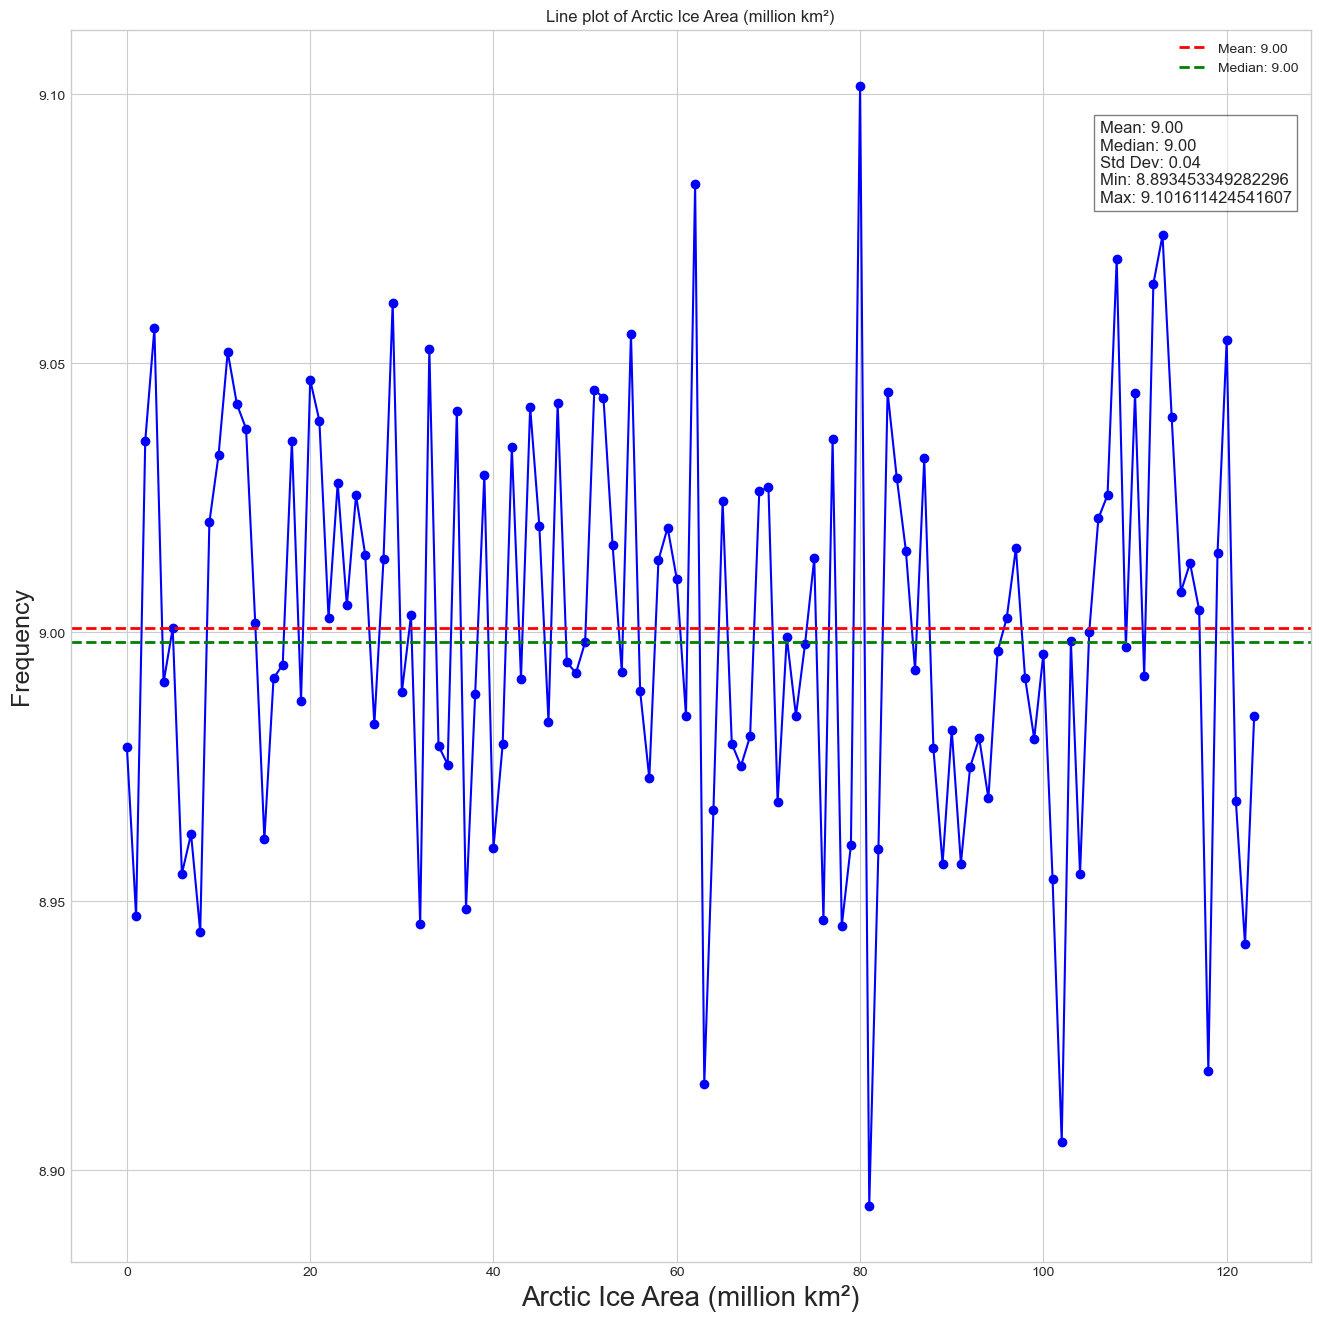

In [42]:
#descriptive statistics of aggregate datas
for var in df.columns:
 if var != "Year":
   desc_stats = ag_data[var].describe()

#Extract keys
   mean_value = desc_stats["mean"]
   median_value = desc_stats["50%"]
   min_value = desc_stats["min"]
   max_value = desc_stats["max"]
   std_dev = desc_stats["std"]
   
   plt.figure(figsize= (16,16))
   plt.title(f'Line plot of {var}')
   plt.xlabel(var, fontsize = 20)
   plt.ylabel('Frequency', fontsize = 18)
   plt.plot(ag_data[var], marker = 'o', color = 'b')
   plt.axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
   plt.axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")
   
   # Display descriptive stats on the plot
   stats_text = (f"Mean: {mean_value:.2f}\n"
                 f"Median: {median_value:.2f}\n"
                 f"Std Dev: {std_dev:.2f}\n"
                 f"Min: {min_value}\n"
                 f"Max: {max_value}")
   plt.text(0.83, 0.86, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
   
   plt.legend()
   plt.grid(True)
   plt.show()


C:\Users\Karun Bhandari\AppData\Local\Temp\ipykernel_11216\216853004.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


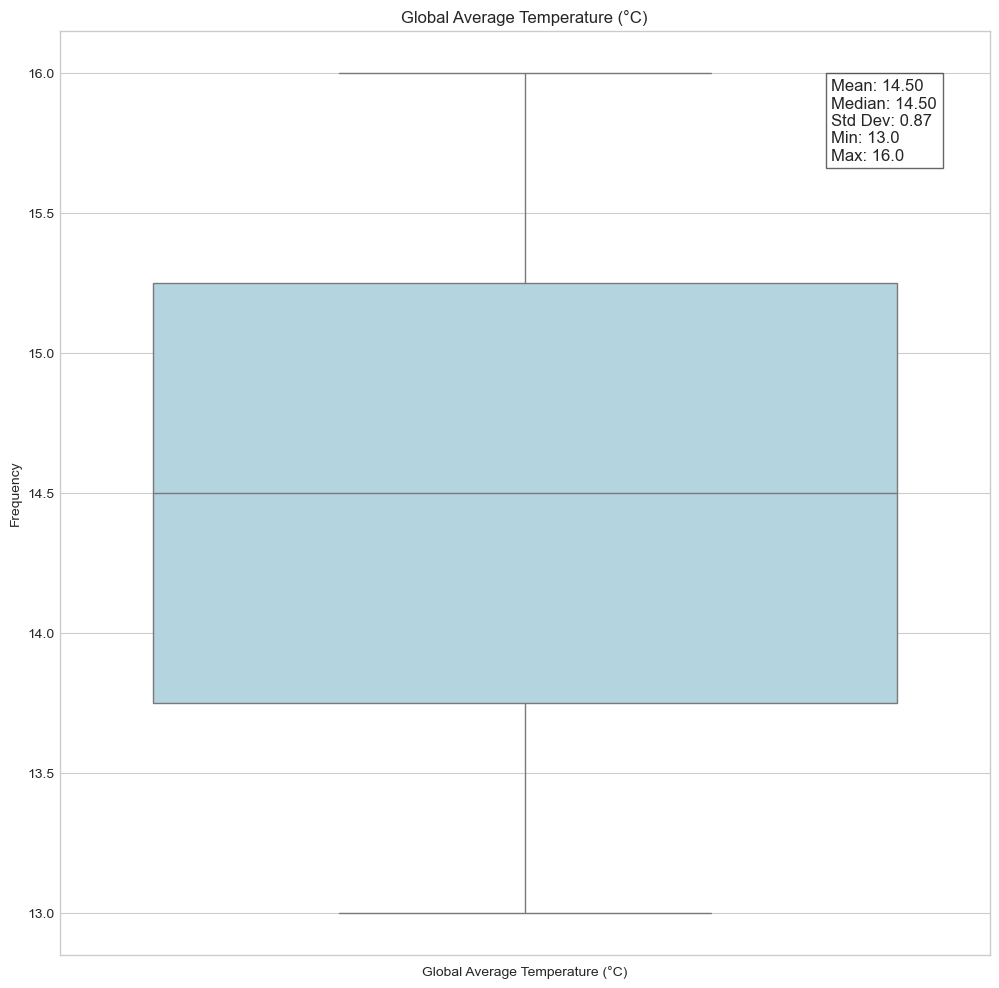

C:\Users\Karun Bhandari\AppData\Local\Temp\ipykernel_11216\216853004.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


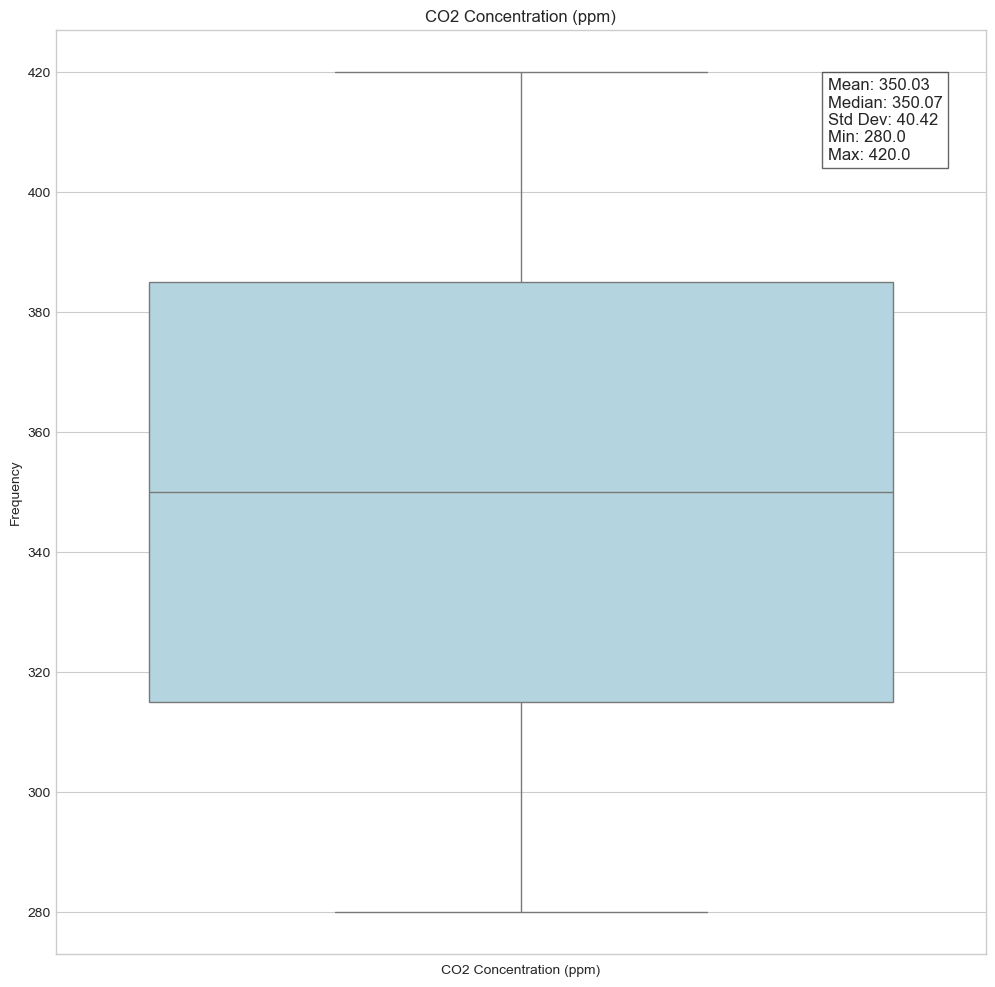

C:\Users\Karun Bhandari\AppData\Local\Temp\ipykernel_11216\216853004.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


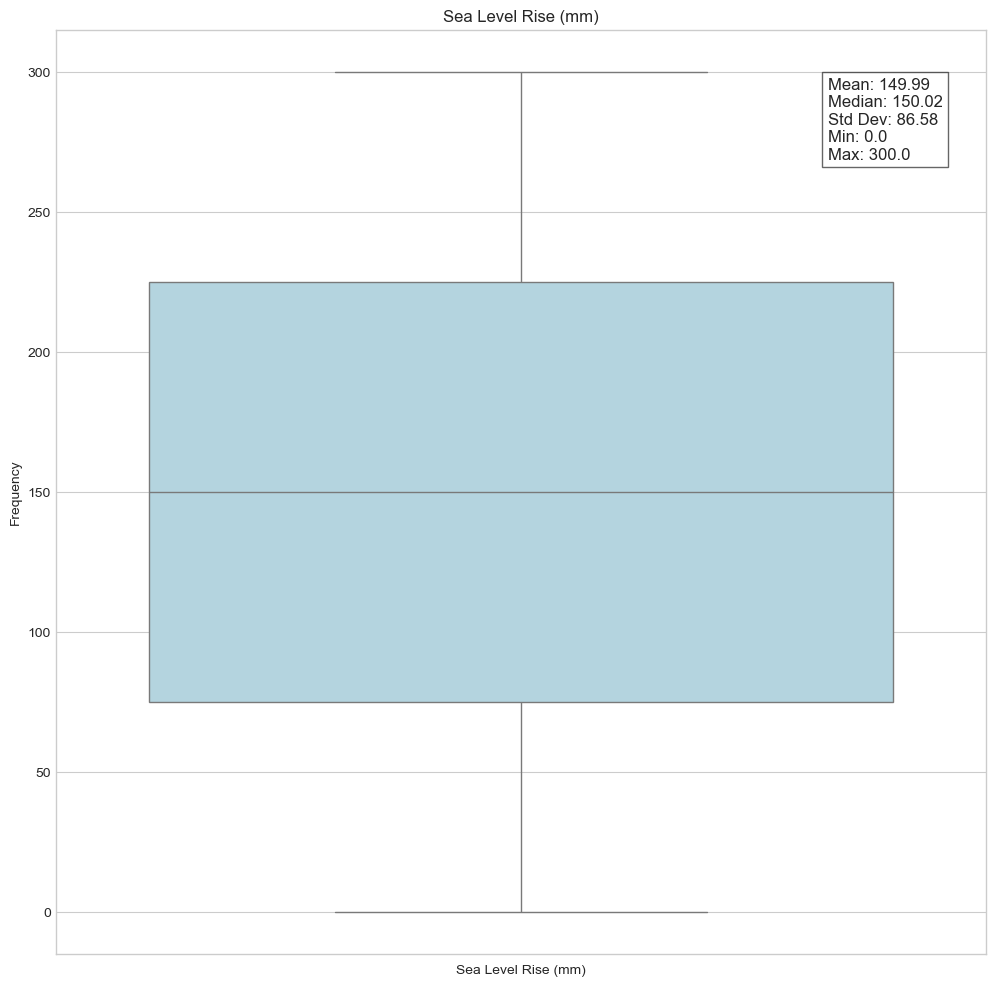

C:\Users\Karun Bhandari\AppData\Local\Temp\ipykernel_11216\216853004.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


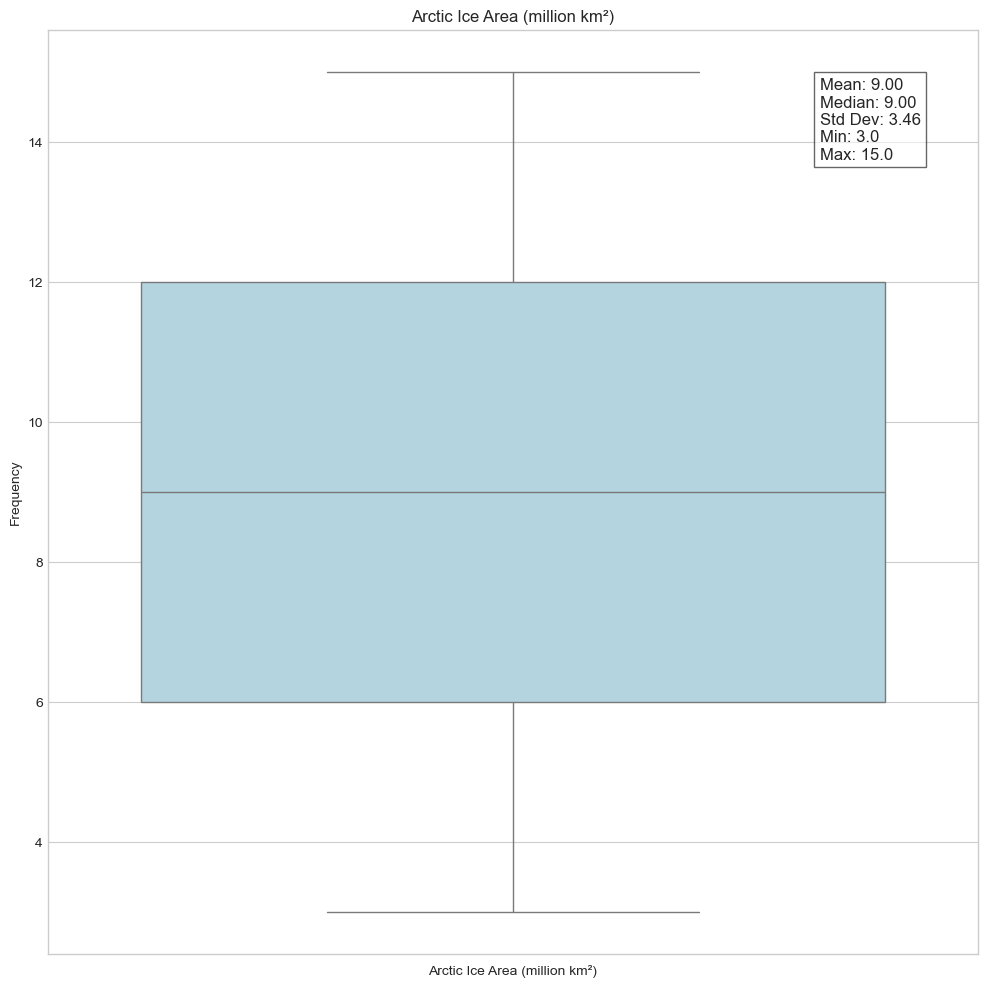

In [43]:
# Univariate analysis with boxplot
for var in df.columns:
 if var != "Year":
   disc = df[var].describe()

   #Extract keys
   mean_value1 = disc["mean"]
   median_value1 = disc["50%"]
   min_value1 = disc["min"]
   max_value1 = disc["max"]
   std_dev1 = disc["std"]
   
   plt.figure(figsize=(12,12))
   sns.boxplot(df[var], color= "lightblue")
   plt.title(var)
   plt.xlabel(var)
   plt.ylabel("Frequency")
   
   stats_text = (f"Mean: {mean_value1:.2f}\n"
                 f"Median: {median_value1:.2f}\n"
                 f"Std Dev: {std_dev1:.2f}\n"
                 f"Min: {min_value1}\n"
                 f"Max: {max_value1}")
   plt.text(0.83, 0.86, stats_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
   
   plt.legend()
   plt.show()

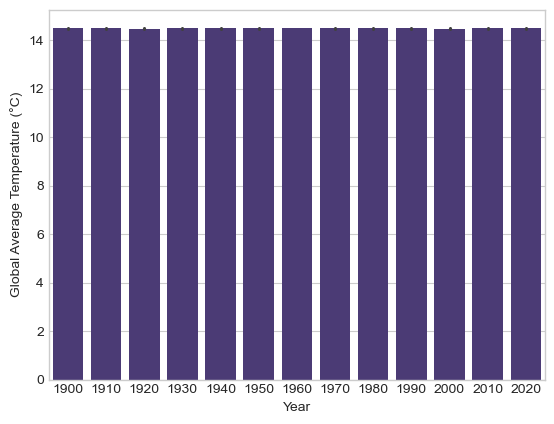

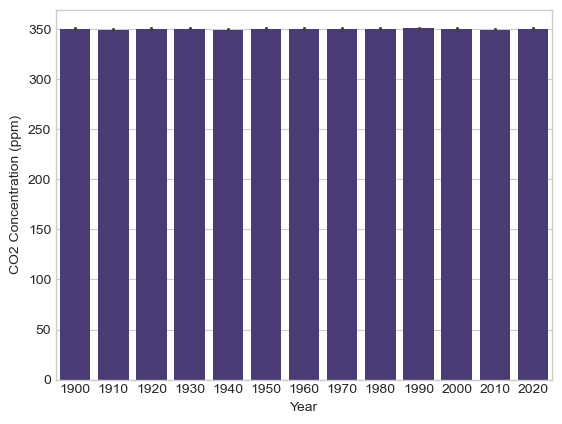

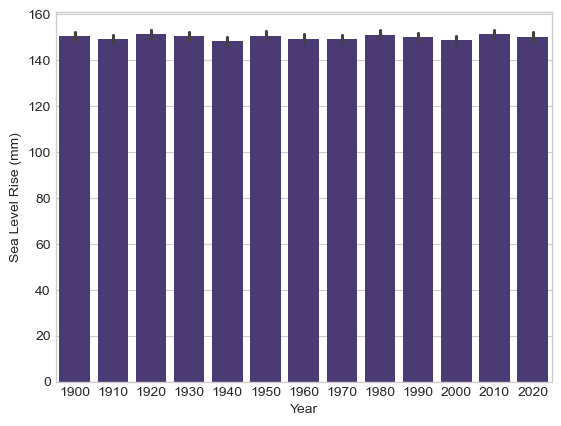

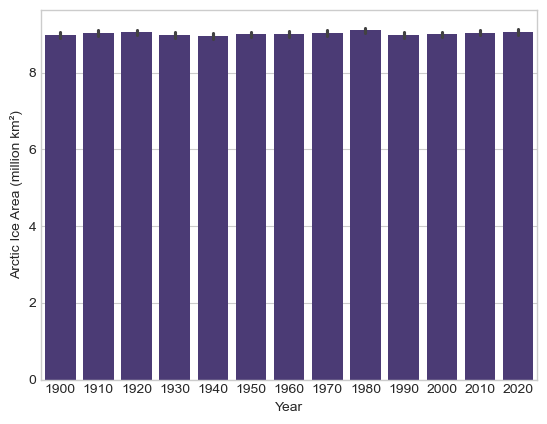

In [56]:
filter_data= df[df["Year"] % 10 == 0]
for var in df.columns:
    if var != 'Year':
        plt.Figure(figsize=(6,6))
        sns.barplot(data= filter_data,x=filter_data["Year"],y= filter_data[var])
        plt.show()
            

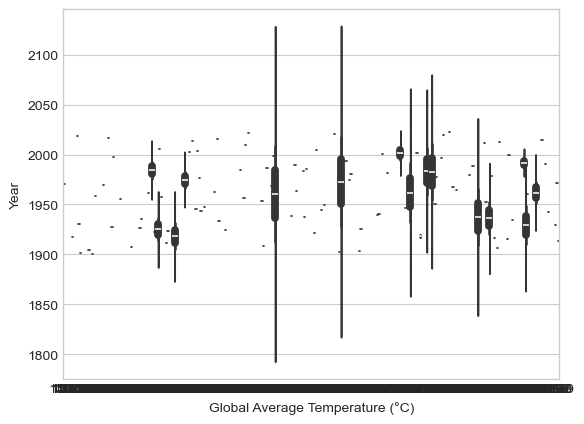

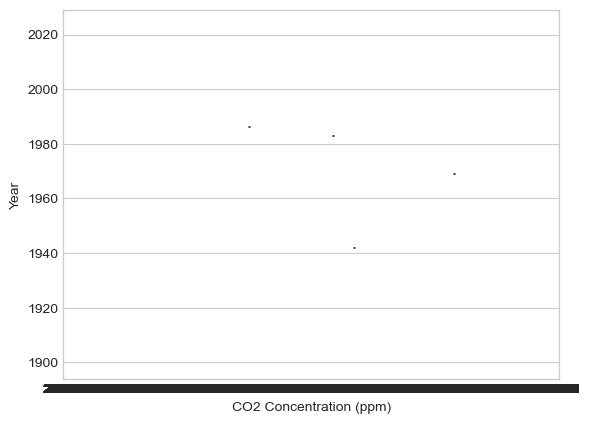

In [ ]:
for var in df.columns:
    if var != 'Year':
        plt.Figure(figsize= (4,4))
        sns.violinplot(data=ag_data,x = ag_data[var])
        plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.044397   
Global Average Temperature (°C) -0.044397                         1.000000   
CO2 Concentration (ppm)          0.082761                        -0.067980   
Sea Level Rise (mm)             -0.081506                         0.003878   
Arctic Ice Area (million km²)   -0.082203                         0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.082761            -0.081506   
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice 

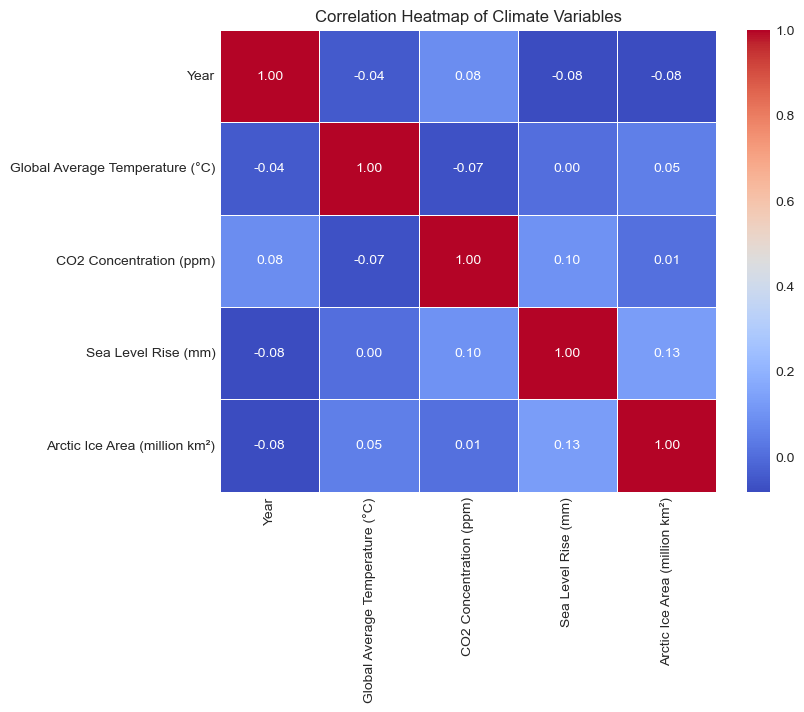

In [44]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
correlation_matrix = ag_data.corr()

# Print correlation values
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Climate Variables")
plt.show()

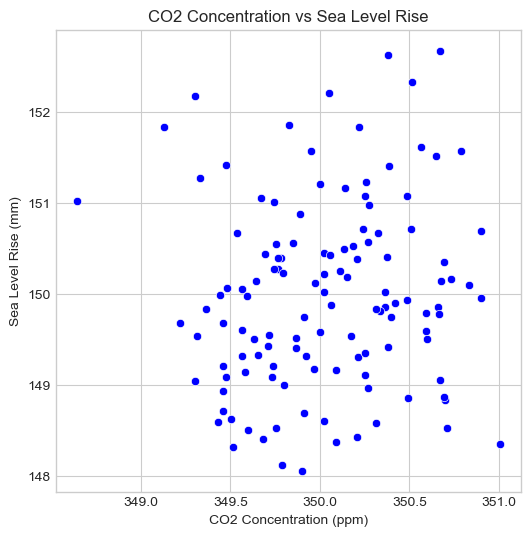

In [45]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=ag_data["CO2 Concentration (ppm)"], y=ag_data["Sea Level Rise (mm)"], color="b")

plt.title("CO2 Concentration vs Sea Level Rise")
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel("Sea Level Rise (mm)")

plt.grid(True)
plt.show()

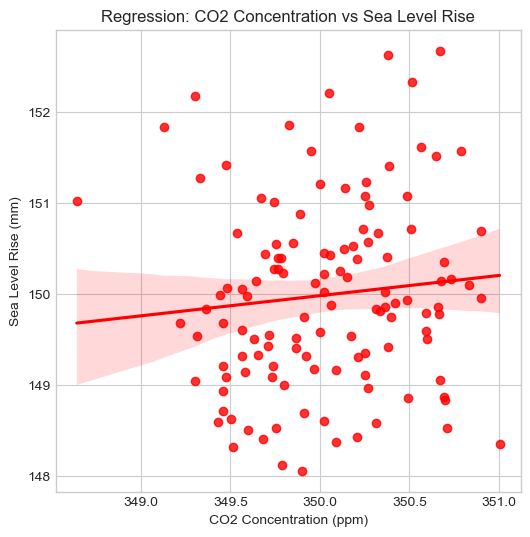

In [46]:
plt.figure(figsize=(6, 6))
sns.regplot(x=ag_data["CO2 Concentration (ppm)"], y=ag_data["Sea Level Rise (mm)"], color="r")

plt.title("Regression: CO2 Concentration vs Sea Level Rise")
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel("Sea Level Rise (mm)")
plt.grid(True)
plt.show()

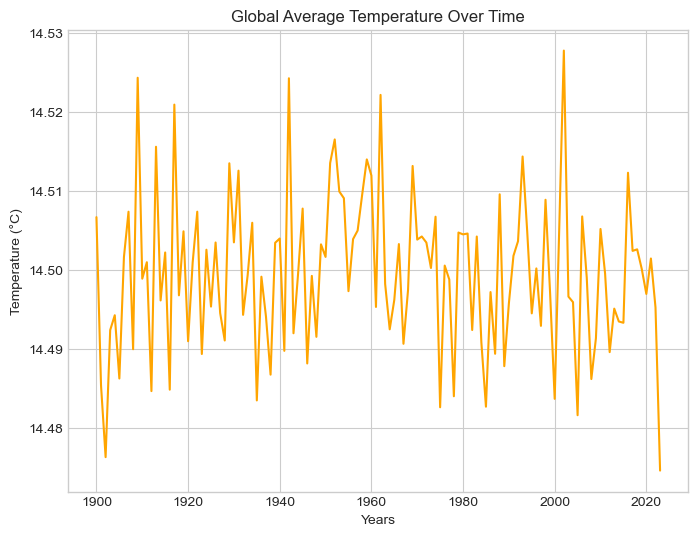

In [47]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=ag_data["Year"], y=ag_data["Global Average Temperature (°C)"], color="orange")

plt.title("Global Average Temperature Over Time")
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

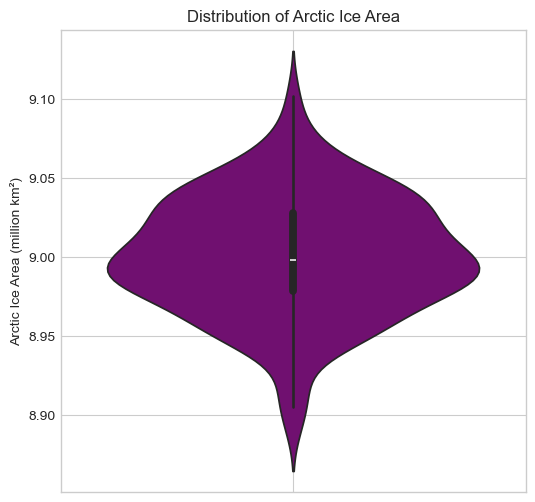

In [48]:
plt.figure(figsize=(6, 6))
sns.violinplot(y=ag_data["Arctic Ice Area (million km²)"], color="purple")

plt.title("Distribution of Arctic Ice Area")
plt.ylabel("Arctic Ice Area (million km²)")
plt.grid(True)
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

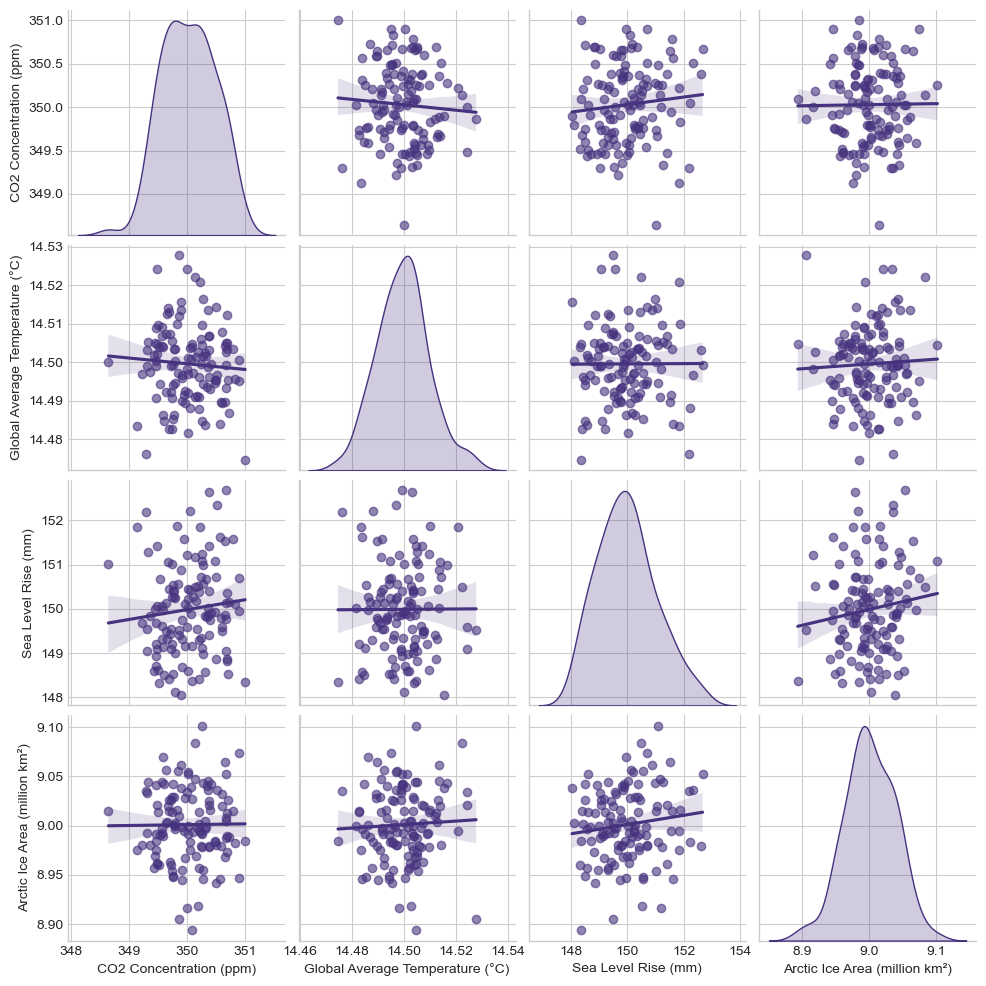

In [50]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
variables = ['CO2 Concentration (ppm)', 'Global Average Temperature (°C)', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']
# Pairplot
sns.pairplot(ag_data, vars = variables, kind= "reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})

plt.show()

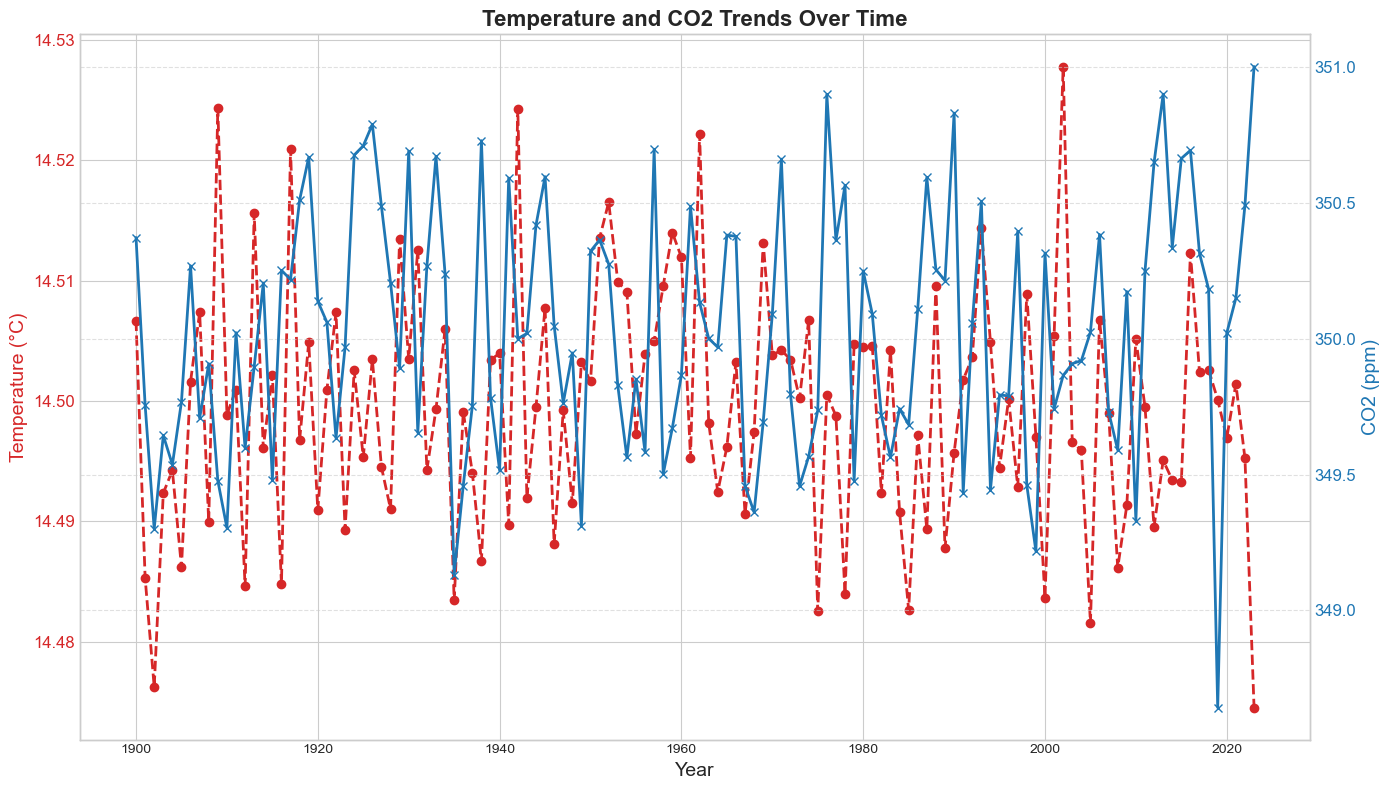

In [52]:
#Multivariate time series plot 
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:red', fontsize=14)
ax1.plot(ag_data['Year'], ag_data['Global Average Temperature (°C)'], color='tab:red', linewidth=2.0, linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

ax2 = ax1.twinx()
ax2.set_ylabel('CO2 (ppm)', color='tab:blue', fontsize=14)
ax2.plot(ag_data['Year'], ag_data['CO2 Concentration (ppm)'], color='tab:blue', linewidth=2.0, linestyle='-', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

plt.title('Temperature and CO2 Trends Over Time', fontsize=16, fontweight='bold')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here